<style>
#notebook-container {
    padding: 15px;
    background-color: #fff;
    min-height: 0;
    -webkit-box-shadow: 0px 0px 0px 0px rgba(87, 87, 87, 0.2);
    box-shadow: 0px 0px 0px 0px rgba(87, 87, 87, 0.2);
</style>

vers. 1.0.0

<a href="../economy/index.html">На главную страницу</a>

In [1]:
from IPython.display import HTML

HTML('''
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

# Численность работников в крупнейших компаниях России
## Отраслевой срез

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

path = 'C:/Users/yraz/test_site/image/'

<a href="../economy/company_list_p.html" target="_blank">Описание набора данных</a>

<pre>
Значения столбцов:
- name           - наименование компании
- industry       - отрасль
- p2013 - p2017  - данные о численности персонала по годам
<pre>

In [3]:
# Загрузка и первичная фильтрация данных
print('Набор данных о численности персонала в ключевых компаниях РФ')
df = pd.read_excel('./../data/data.xlsx')
df = df.drop(['city', 'v2017', 'i2017', 'i2016', 'i2015', 'i2014', 'i2013', 'v', 'v2013', 'v2014', 'v2015', 'v2016', 'forg',
             'country', 'state'], axis=1)
df.head()

Набор данных о численности персонала в ключевых компаниях РФ


,name,industry,p2013,p2014,p2015,p2016,p2017
0,Газпром,Нефть и газ,459500.0,459600.0,462400.0,467400.0,463000.0
1,ЛУКОЙЛ,Нефть и газ,109600.0,110300.0,106200.0,105500.0,103600.0
2,Роснефть,Нефть и газ,228000.0,248900.0,261500.0,295800.0,302100.0
3,Сбербанк России,Финансы,306123.0,329566.0,330677.0,325075.0,310300.0
4,Российские железные дороги,Транспорт,902000.0,835000.0,809000.0,774000.0,755000.0


Первые 5 компаний в списке

In [4]:
print('Характеристики набора данных:\n')
print('Общее количество компаний                               : ', len(df['p2017']), '\n')

print('Данных по количеству персонала за 2017 год              : ', df['p2017'].isnull().value_counts()[0], ' организаций')
print('Отсутствуют данные по количеству персонала за 2017 год  : ', df['p2017'].isnull().value_counts()[1], ' организаций\n')


Характеристики набора данных:

Общее количество компаний                               :  661 

Данных по количеству персонала за 2017 год              :  372  организаций
Отсутствуют данные по количеству персонала за 2017 год  :  289  организаций



## Заполнение отсутствующих данных по годам, данными за прошлые периоды.

Если за определенный год отсутствуют данные, пропуски заполняются данными для данной компании за предыдущий год. Если за предыдущий год данных нет, принимаются данные за ближайший год, для которого имеются данные. 

Результаты обработки заносятся в новые столбцы  <samp>**pv2013 - pv2017**</samp>

In [5]:
df['pv2017'] = df['p2017'].fillna(df['p2016']).fillna(df['p2015']).fillna(df['p2014']).fillna(df['p2013'])
df['pv2016'] = df['p2016'].fillna(df['p2015']).fillna(df['p2014']).fillna(df['p2013'])
df['pv2015'] = df['p2015'].fillna(df['p2014']).fillna(df['p2013'])
df['pv2014'] = df['p2014'].fillna(df['p2013'])
df['pv2013'] = df['p2013']


print('В новом обновленном наборе данных: \n')
print('Данных по количеству персонала за 2017 год              : ', df['pv2017'].isnull().value_counts()[0], ' организаций')
print('Отсутствуют данные по количеству персонала за 2017 год  : ', df['pv2017'].isnull().value_counts()[1], ' организаций')

В новом обновленном наборе данных: 

Данных по количеству персонала за 2017 год              :  548  организаций
Отсутствуют данные по количеству персонала за 2017 год  :  113  организаций


In [6]:
df = df.loc[:, ['name', 'industry', 'p2013', 'p2014', 'p2015', 'p2016', 'p2017', 'pv2013', 'pv2014', 
                'pv2015', 'pv2016', 'pv2017']]
df.head()

,name,industry,p2013,p2014,p2015,p2016,p2017,pv2013,pv2014,pv2015,pv2016,pv2017
0,Газпром,Нефть и газ,459500.0,459600.0,462400.0,467400.0,463000.0,459500.0,459600.0,462400.0,467400.0,463000.0
1,ЛУКОЙЛ,Нефть и газ,109600.0,110300.0,106200.0,105500.0,103600.0,109600.0,110300.0,106200.0,105500.0,103600.0
2,Роснефть,Нефть и газ,228000.0,248900.0,261500.0,295800.0,302100.0,228000.0,248900.0,261500.0,295800.0,302100.0
3,Сбербанк России,Финансы,306123.0,329566.0,330677.0,325075.0,310300.0,306123.0,329566.0,330677.0,325075.0,310300.0
4,Российские железные дороги,Транспорт,902000.0,835000.0,809000.0,774000.0,755000.0,902000.0,835000.0,809000.0,774000.0,755000.0


## Отраслевой срез по численности персонала

Для дальнейшей оценки численности персонала, данные по компаниям группируются по отраслям:

In [7]:
# Создаем множество set, которое содержит названия отраслей
ind_set = set(df.industry.values)

print('Всего отраслей :  ', len(ind_set))

Всего отраслей :   35


Для каждой отрасли, расчитывается два показателя:
- среднее значение количества сотрудников для отрасли <samp>(**ind_mean**)</samp>
- медианное значение количества сотрудников для отрасли <samp>(**ind_median**)</samp>

Обновленный набор данных:

In [8]:
# Создается два пустых словаря для названий отраси и его медианного и среднего значений

ind_mean    = dict()
ind_median  = dict()

for i in ind_set:
    frame = df[df['industry'] == i]
    
    frame_mean   = frame.pv2017.mean()
    frame_median = frame.pv2017.median()
    
    ind_mean[i] = frame_mean
    ind_median[i] = frame_median

In [9]:
# Среднее и медианное значение по отрасли

df['ind_mean']   = df['industry'].map(ind_mean).round()
df['ind_median'] = df['industry'].map(ind_median).round()

In [10]:
df.head()

,name,industry,p2013,p2014,p2015,p2016,p2017,pv2013,pv2014,pv2015,pv2016,pv2017,ind_mean,ind_median
0,Газпром,Нефть и газ,459500.0,459600.0,462400.0,467400.0,463000.0,459500.0,459600.0,462400.0,467400.0,463000.0,36975.0,4300.0
1,ЛУКОЙЛ,Нефть и газ,109600.0,110300.0,106200.0,105500.0,103600.0,109600.0,110300.0,106200.0,105500.0,103600.0,36975.0,4300.0
2,Роснефть,Нефть и газ,228000.0,248900.0,261500.0,295800.0,302100.0,228000.0,248900.0,261500.0,295800.0,302100.0,36975.0,4300.0
3,Сбербанк России,Финансы,306123.0,329566.0,330677.0,325075.0,310300.0,306123.0,329566.0,330677.0,325075.0,310300.0,14312.0,5979.0
4,Российские железные дороги,Транспорт,902000.0,835000.0,809000.0,774000.0,755000.0,902000.0,835000.0,809000.0,774000.0,755000.0,38638.0,5295.0


In [11]:
df['pv2017_me']    = df['pv2017'].fillna(df['ind_mean'])
df['pv2017_md']  = df['pv2017'].fillna(df['ind_median'])

Отсутствующие данные для 2017 года заполняются значениями среднего и медианы по данной отрасли.

Оценочное количество работников:
- <samp>**pv2017_md**</samp> - количество человек на предприятиях за 2017 год (отсутствующие данные принимаются <samp class="text-info">медианными</samp> для отрасли) 
- <samp>**pv2017_me**</samp> - количество человек на предприятиях за 2017 год (отсутствующие данные принимаются <samp class="text-info">средними</samp> для отрасли) 

Обновленный набор данных. Пропущенные данные заполнены средними и медианными показателями для отрасли.

In [12]:
df[['name', 'industry', 'pv2013', 'pv2014', 'pv2015', 'pv2016', 'pv2017',  'pv2017_md', 'pv2017_me', 
    'ind_mean', 'ind_median']].head()

,name,industry,pv2013,pv2014,pv2015,pv2016,pv2017,pv2017_md,pv2017_me,ind_mean,ind_median
0,Газпром,Нефть и газ,459500.0,459600.0,462400.0,467400.0,463000.0,463000.0,463000.0,36975.0,4300.0
1,ЛУКОЙЛ,Нефть и газ,109600.0,110300.0,106200.0,105500.0,103600.0,103600.0,103600.0,36975.0,4300.0
2,Роснефть,Нефть и газ,228000.0,248900.0,261500.0,295800.0,302100.0,302100.0,302100.0,36975.0,4300.0
3,Сбербанк России,Финансы,306123.0,329566.0,330677.0,325075.0,310300.0,310300.0,310300.0,14312.0,5979.0
4,Российские железные дороги,Транспорт,902000.0,835000.0,809000.0,774000.0,755000.0,755000.0,755000.0,38638.0,5295.0


Кумулятивная кривая оценочного количество работников на предприятиях с учетом заполнения отсутствующих данных средними и медианными значениями по соответствующей отрасли: 

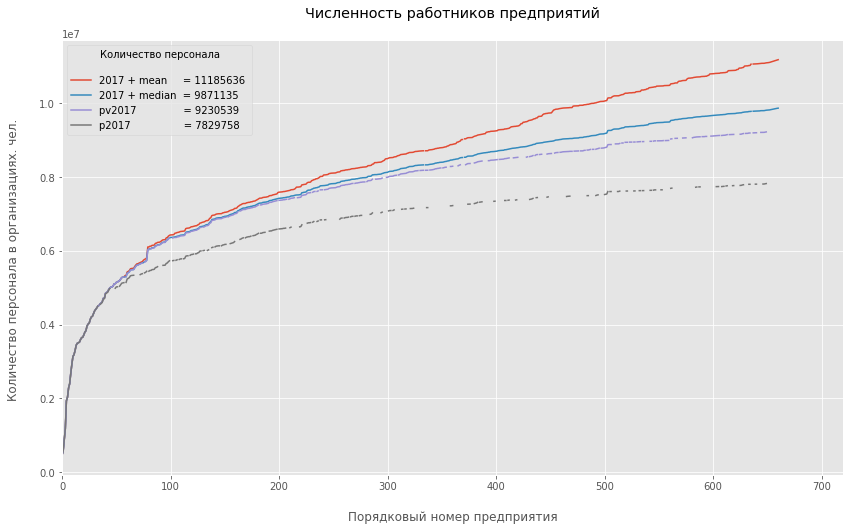

In [13]:
plt.figure(figsize=(14, 8))
plt.title('Численность работников предприятий\n')


plt.plot(df.index, df.pv2017_me.cumsum(), label='2017 + mean     = {} '.format(int(df.pv2017_me.sum())))
plt.plot(df.index, df.pv2017_md.cumsum(), label='2017 + median  = {} '.format(int(df.pv2017_md.sum())))
plt.plot(df.index, df.pv2017.cumsum(), label='pv2017               = {} '.format(int(df.pv2017.sum())))
plt.plot(df.index, df.p2017.cumsum(), label='p2017                 = {} '.format(int(df.p2017.sum())))

x = df.index.max()

plt.xlim(0, 720)

plt.legend(title='Количество персонала\n')
plt.ylabel('Количество персонала в организациях. чел. \n')
plt.xlabel('\nПорядковый номер предприятия')

plt.show()

In [14]:
print('\nОценочное количество персонала на предприятиях в 2017 году:\n')
print('pv2017_me  = ', df['pv2017_me'].sum().astype(int), '  учтено компаний: ', df['pv2017_me'].isnull().value_counts()[0])
print('pv2017_md  = ', df['pv2017_md'].sum().astype(int), '   учтено компаний: ', df['pv2017_md'].isnull().value_counts()[0])
print('pv2017     = ', df['pv2017'].sum().astype(int), '   учтено компаний: ', df['pv2017'].isnull().value_counts()[0])
print('p2017      = ', df['p2017'].sum().astype(int), '   учтено компаний: ', df['p2017'].isnull().value_counts()[0])

print('\n\nРазность оценок количества персонала на предприятиях:\n')
print('pv2017_me - pv2017_md  = ', (df['pv2017_me'].sum().astype(int)) - (df['pv2017_md'].sum().astype(int)), ' чел.')
print('pv2017_me - pv2017     = ', (df['pv2017_me'].sum().astype(int)) - (df['pv2017'].sum().astype(int)), ' чел.')
print('pv2017_md - pv2017     = ', (df['pv2017_md'].sum().astype(int)) - (df['pv2017'].sum().astype(int)), '  чел.')


Оценочное количество персонала на предприятиях в 2017 году:

pv2017_me  =  11185636   учтено компаний:  658
pv2017_md  =  9871135    учтено компаний:  658
pv2017     =  9230539    учтено компаний:  548
p2017      =  7829758    учтено компаний:  372


Разность оценок количества персонала на предприятиях:

pv2017_me - pv2017_md  =  1314501  чел.
pv2017_me - pv2017     =  1955097  чел.
pv2017_md - pv2017     =  640596   чел.


## Группировка предприятий по отраслям

Предприятия группируются по отраслям. Значения в ячейках в каждом столбце суммируются. Например в ячейке p2013 Нефть и газ - суммарное количество персонала для всех предприятий нефтегазовой отрасли в 2013 году.

In [15]:
indry = df.groupby('industry').sum()
indry = indry.drop(['ind_mean', 'ind_median'], axis=1)
indry = indry.sort_values('pv2017', ascending=False)
indry = indry.astype(int)
indry

,p2013,p2014,p2015,p2016,p2017,pv2013,pv2014,pv2015,pv2016,pv2017,pv2017_me,pv2017_md
industry,,,,,,,,,,,,
Нефть и газ,1065774,1061486,1187506,1188636,1270487,1065774,1091456,1224334,1243425,1294139,1922714,1367239
Торговля,522519,636529,722317,710063,874440,522519,666999,752787,861982,1118735,1403165,1235075
Транспорт,977729,915674,962220,851852,914918,977729,918491,968465,932188,1004592,1352334,1052247
ОПК и машиностроение,534269,670812,678423,791653,887594,534269,683643,694789,821631,980340,1008350,994685
Металлы и горная добыча,826336,830829,808402,671250,766958,826336,861472,839045,840425,843272,1028384,933272
Финансы,685850,798438,779858,749309,781900,685850,800544,781964,781026,815776,844400,827734
Электроэнергетика,479899,485991,484242,444025,473146,479899,486511,499438,503732,501795,519716,505687
Сельское хозяйство и продукты питания,87161,140132,141903,126429,269575,87161,140132,164484,196317,337673,428269,403673
Телекоммуникации,326253,324547,262421,257390,278299,326253,324547,321443,316412,301758,339478,320692


## Графики численности работников по отраслям

График численности работников по отраслям показывает, какое суммарное количество работников, которые заняты в компаниях определенной отрасли.

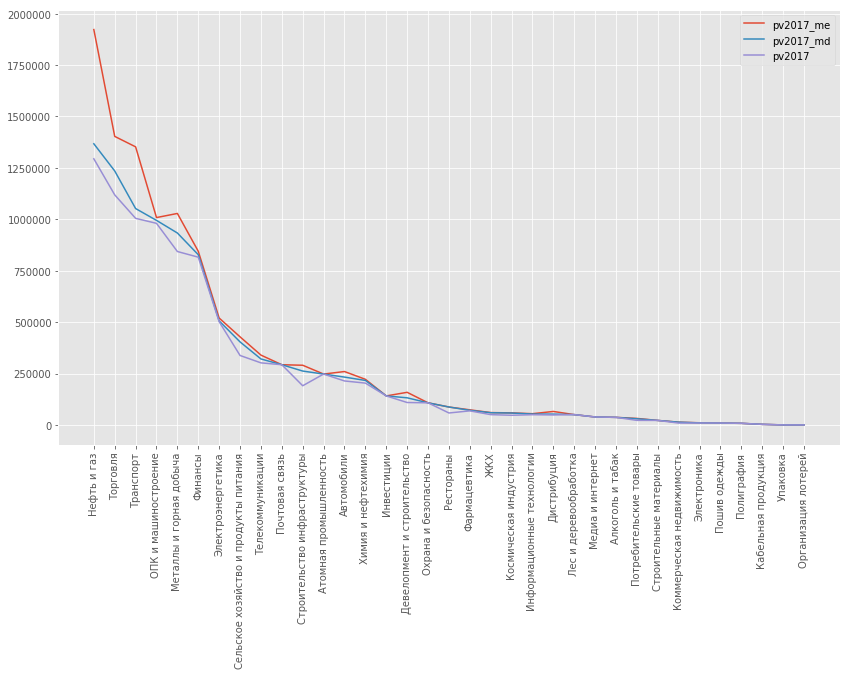

In [16]:
plt.figure(figsize=(14, 8))
i = indry.sort_values('pv2017_md', ascending=False)

width=0.8
plt.plot(i.index, i.pv2017_me)
plt.plot(i.index, i.pv2017_md)
plt.plot(i.index, i.pv2017)

plt.xticks(rotation=90)

plt.legend()
plt.show()

In [17]:
print('pv2017_me  = ', df['pv2017_me'].sum().astype(int), '  учтено компаний: ', df['pv2017_me'].isnull().value_counts()[0])
print('pv2017_md  = ', df['pv2017_md'].sum().astype(int), '   учтено компаний: ', df['pv2017_md'].isnull().value_counts()[0])
print('pv2017     = ', df['pv2017'].sum().astype(int), '   учтено компаний: ', df['pv2017'].isnull().value_counts()[0])

pv2017_me  =  11185636   учтено компаний:  658
pv2017_md  =  9871135    учтено компаний:  658
pv2017     =  9230539    учтено компаний:  548


Кумулятивные графики количества работников предприятий по отраслям.

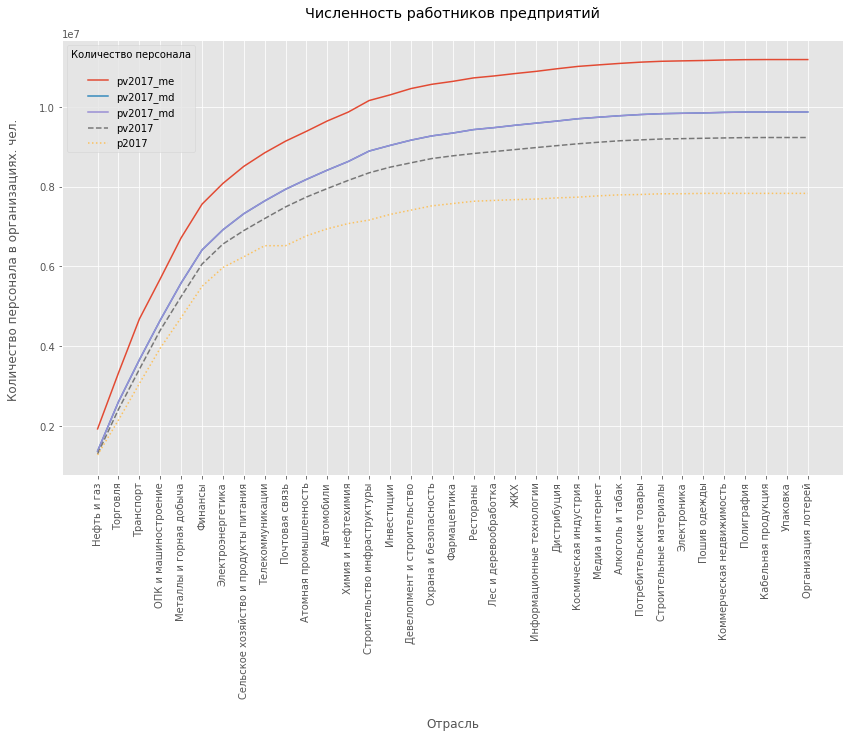

In [18]:
plt.figure(figsize=(14, 8))
plt.title('Численность работников предприятий\n')

plt.plot(indry.index, indry.pv2017_me.cumsum())
plt.plot(indry.index, indry.pv2017_md.cumsum())
plt.plot(indry.index, indry.pv2017_md.cumsum())
plt.plot(indry.index, indry.pv2017.cumsum(), linestyle='--')
plt.plot(indry.index, indry.p2017.cumsum(), linestyle=':')


x = df.index.max()

plt.xticks(rotation=90)
plt.legend(title='Количество персонала\n')
plt.ylabel('Количество персонала в организациях. чел. \n')
plt.xlabel('\nОтрасль')

plt.show()

## Численность работников на предприятиях по отраслям

Компании сгруппированы по отраслям. Каждое предприятие на графике, отмечено окружностью в соответствующем столбце. Размер окружности, соответствует относительному масштабу численности работников предприятия. Чем больше работников на предприятии, тем выше расположена окружность и тем больше её диаметр.

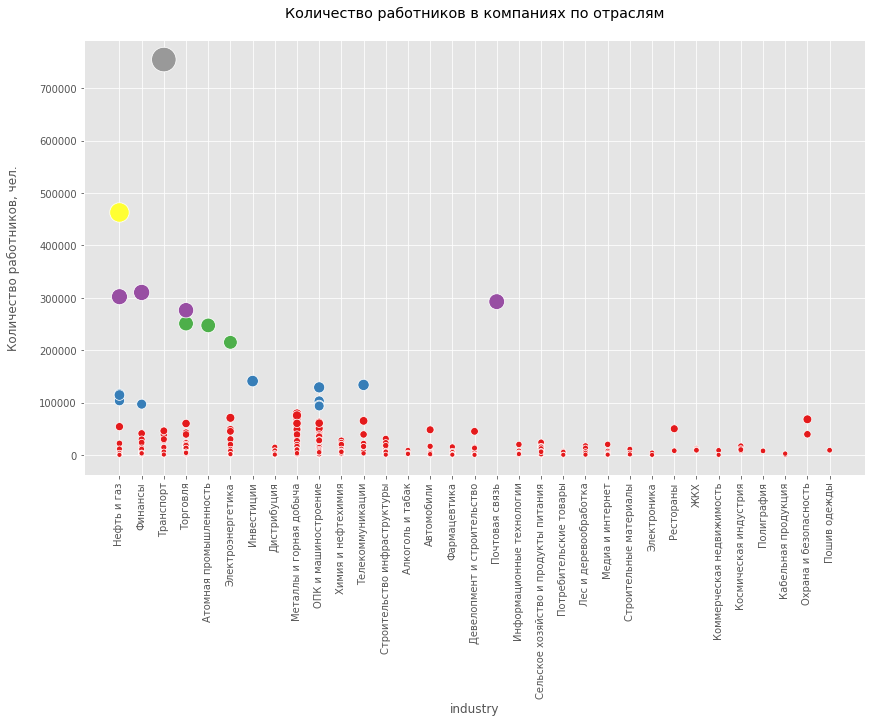

In [19]:
plt.figure(figsize=(14, 8))
plt.title('Количество работников в компаниях по отраслям\n')
sns.scatterplot(x=df.industry, y=df.pv2017, size=df.pv2017, sizes=(25, 600), palette='Set1', hue=df.pv2017, legend=False)
plt.ylabel('Количество работников, чел.\n')
plt.xticks(rotation=90)
plt.show()

In [20]:
print('Количество компаний: ', df.pv2017.sum().astype(int), 'чел.',  df['pv2017'].isnull().value_counts()[0], 'компаний ')

Количество компаний:  9230539 чел. 548 компаний 
